## <p>For performing Employee turnover using machine learning I have used dataset from <a herf = "https://www.kaggle.com/giripujar/hr-analytics">kaggle</a>.Below is the brief description about data.</p>

## Data Description:

### This data is consist of 10 variables(columns) and 15,000 observation(rows).Each row represent a employee which has revelent values for each 10 variabales.More detail about columns is mentioned below:

* <b>satisfaction_level (Numerical):</b> This column represents employee satisfaction level between 0 to 1 where 0 represents least and 1 represents high.
* <b>last_evaluation (Numerical):</b> This column represents how much time since last evaluation of employee.</br>
* <b>number_project (Numerical):</b> This column reprsents how much projects employee has done so far.</br>
* <b>average_montly_hours (Numerical):</b> This column represents average monthly hours employee has spend in organization.</br>
* <b>time_spend_company (Numerical):</b> This column represents how many years employee has spend in organization</br>
* <b>Work_accident (Numerical):</b></b> This column represents while working whether they have any work accident or not where 1 means yes they have work accident and 0 means No they have not work accident.</br>
* <b>promotion_last_5years (Numerical):</b> This column represents whether employee got any promotion or not in last 5 years where 0 means No they got no promotion in last 5 years and 1 means Yes they got promotion in last 5 years.</br>
* <b>Department (Nominal Categorical):</b> This column represents in which department employee is/was working for example sales,IT,accounting etc. there are 10 total category or department exist in the column.</br>
* <b>Salary (Ordinal Categorical):</b> This column repersents salary of employee whether it is hight,low or medium.</br>
* <b>left (Numerical):</b> This column represents whether employee has left the organization or not where 0 means No employee has not left the organization and 1 means Yes employee has left the organization.</br>

## First we will try to get some basic understanding of data by looking at each column

In [1]:
# Imporing required libraries for project

import pandas as pd # for data manipluation
import numpy as np  # for data calculations and statistical measurement
import matplotlib.pyplot as plt #for ineractive visualization charts
import seaborn as sns #for ineractive visualization charts
%matplotlib inline 
import warnings  # For warnings
warnings.filterwarnings("ignore") # To ignore unwanted warnings

In [2]:
# Reading Dataset and loading into variable

employee_churn = pd.read_csv("HR_comma_sep.csv")

In [3]:
# For reading data in googel colab

#from google.colab import files
#uploaded = files.upload()

In [4]:
# For reading data in googel colab

#import io
#employee_churn = pd.read_csv(io.BytesIO(uploaded['HR_comma_sep.csv']))


In [5]:
# structer Of data
employee_churn.shape

(14999, 10)

In [6]:
# Checking data type and null values for each column
employee_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
employee_churn.head

<bound method NDFrame.head of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2        

In [8]:
employee_churn.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Above output suggest us that there no null values in our dataset and data types are also correct for all columns

In [9]:
# printing summary for numerical columns
employee_churn.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### We can see average statisfaction level of employees is 0.6128,average number of project done by eomployees is approximately 4,average monthly hours spend by employees is 201.0503 hours and on an average time spend in company by employees is approximately 4 years.

In [10]:
# printing catergorical columns unique values
print("Department:\n",employee_churn['Department'].value_counts().to_string())
print("\nSalary:\n",employee_churn['salary'].value_counts().to_string())

Department:
 sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630

Salary:
 low       7316
medium    6446
high      1237


### Out all 10 departments most number of employees are in sales where least  number of employees are in managment and salary columns suggest that from given data most of employees salary is low.



## Now we will try to explore data by grouping different column with our target column 'left'  and categorical column in order to generate some insight

In [11]:
# Printing number of churn and non-churn employees
print( "Employee Distribution:\n",employee_churn['left'].value_counts())

Employee Distribution:
 0    11428
1     3571
Name: left, dtype: int64


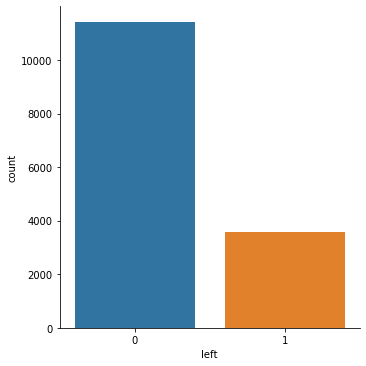

In [12]:
#visualizing Employee Distribution
sns.catplot(data=employee_churn,x='left',kind="count")

## Above result tell us that 3571 employees has left and 11428 employees has stayed.

In [13]:
#Printing all numeric variable and comparing them with our target variable
print('Left Vs all numeric variable:\n\n',employee_churn.groupby('left').mean())

Left Vs all numeric variable:

       satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


## Form the above numbers we interpret that:

* The people who have low statisfaction level are leaving the company more and people with high staisfaction level are staying.
* The people who have less salary are leaving the company more and people with more salary are staying.
* The people who have low promotion rate are leaving the company more and people with high promotion rate are staying.
* The people who have worked more are leaving the company more and people who have worked less are staying.
### This all points makes sense with the reality.

In [14]:
# Printing all features with respect to different departments.
print('Department Vs all numeric variable:\n\n',employee_churn.groupby('Department').mean())

Department Vs all numeric variable:

              satisfaction_level  last_evaluation  number_project  \
Department                                                         
IT                     0.618142         0.716830        3.816626   
RandD                  0.619822         0.712122        3.853875   
accounting             0.582151         0.717718        3.825293   
hr                     0.598809         0.708850        3.654939   
management             0.621349         0.724000        3.860317   
marketing              0.618601         0.715886        3.687646   
product_mng            0.619634         0.714756        3.807095   
sales                  0.614447         0.709717        3.776329   
support                0.618300         0.723109        3.803948   
technical              0.607897         0.721099        3.877941   

             average_montly_hours  time_spend_company  Work_accident  \
Department                                                             
I

In [15]:
# Printing all columns in accordance with Salary column
print('Salary Vs all numeric variable:\n\n',employee_churn.groupby('salary').mean())

Salary Vs all numeric variable:

         satisfaction_level  last_evaluation  number_project  \
salary                                                        
high              0.637470         0.704325        3.767179   
low               0.600753         0.717017        3.799891   
medium            0.621817         0.717322        3.813528   

        average_montly_hours  time_spend_company  Work_accident      left  \
salary                                                                      
high              199.867421            3.692805       0.155214  0.066289   
low               200.996583            3.438218       0.142154  0.296884   
medium            201.338349            3.529010       0.145361  0.204313   

        promotion_last_5years  
salary                         
high                 0.058205  
low                  0.009021  
medium               0.028079  


## Data Visualization

## Ploting histogram of all continuous features 

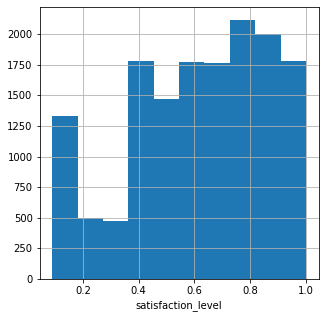

In [16]:
employee_churn["satisfaction_level"].hist(bins=10, figsize=(5,5))
plt.xlabel("satisfaction_level")
plt.show()


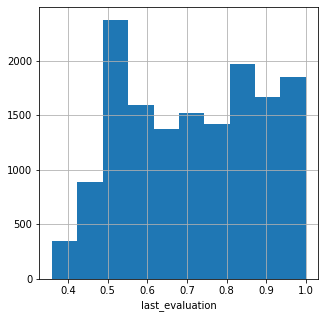

In [17]:
employee_churn["last_evaluation"].hist(bins=10, figsize=(5,5))
plt.xlabel("last_evaluation")
plt.show()

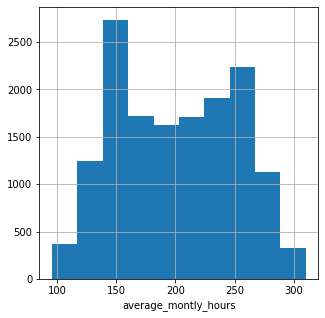

In [18]:
employee_churn["average_montly_hours"].hist(bins=10, figsize=(5,5))
plt.xlabel("average_montly_hours")
plt.show()

### We can see the data distribution of the continoues features in the above plots and can say that our data is skewed.

## Data Visualization of all categorical features with respect to feature "left" that is we are checking that how the data is distributed if we compare it with the people who are leaving the company

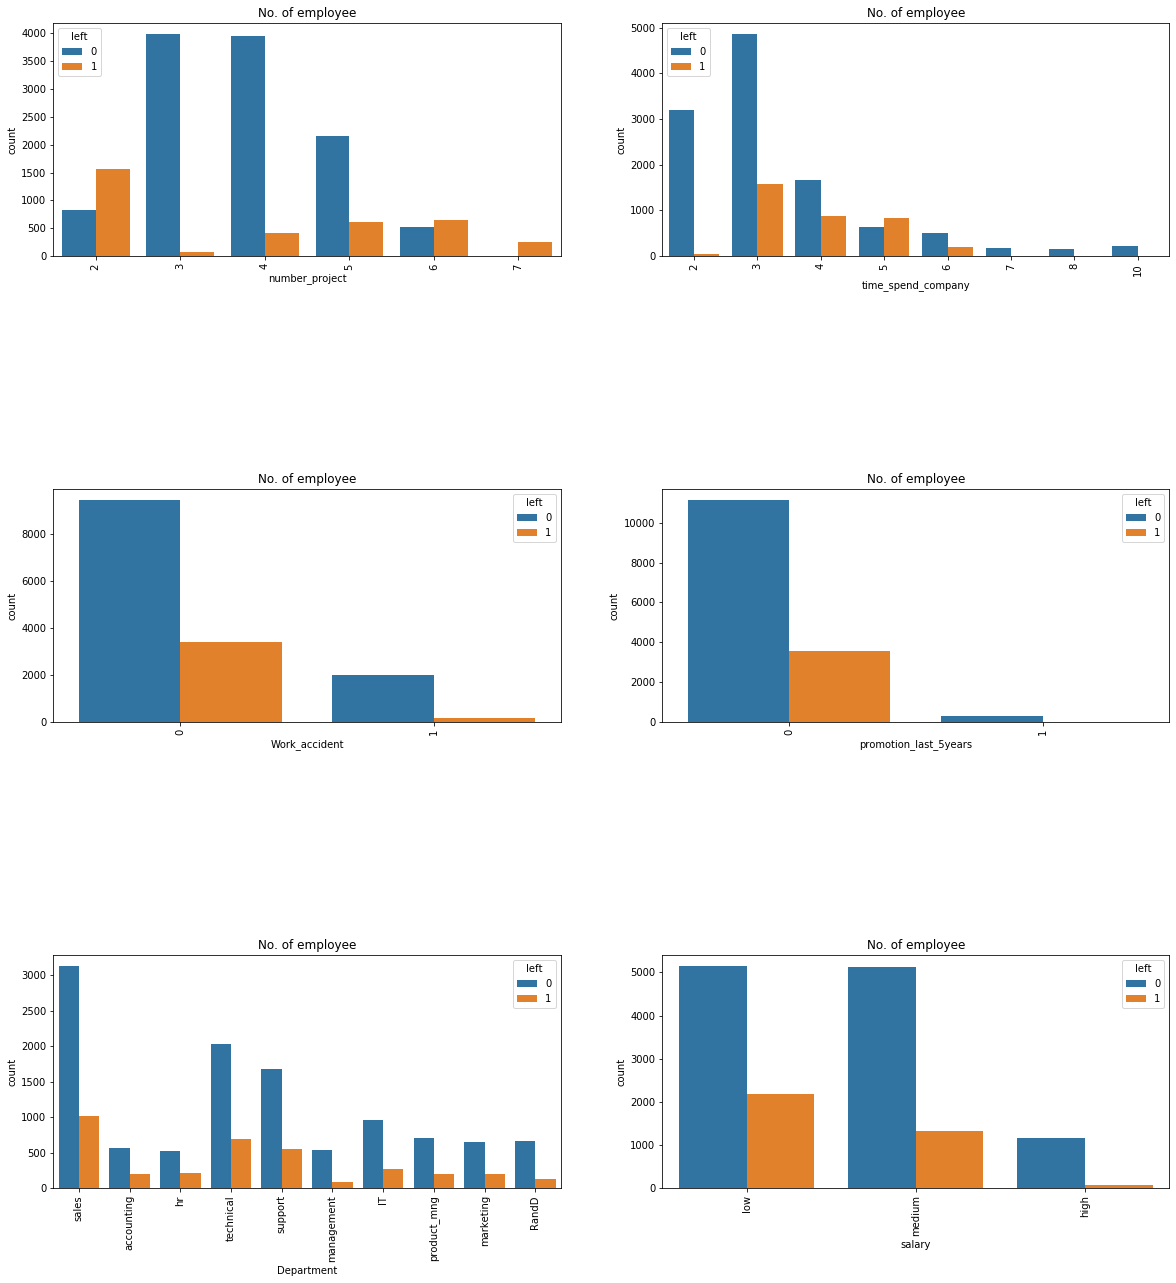

In [19]:
#ploting all feature with respect to feature "left"

columns=['number_project','time_spend_company','Work_accident', 'promotion_last_5years','Department','salary']
fig=plt.subplots(figsize=(20,30))
for i, j in enumerate(columns):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = employee_churn, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

### The above plot shows us few important observations

*   Department as people say that sales people do often change their job frequently, also technical, support, IT can be considered as technology oriented people also tends to change there job most of the time.
 and salary are the 2 most important features which affect in 
employee turnover. Thus these 2 feature can be play vital role in predicting the employee churn.
*   Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.
*   Promotion becomes the reason to leave or stay in the company as our data provides evidence to support our statement, people who had promoted in last 5 years stays in the company and the others tends to leave.
*   Work accident is also important factor as we can see that people with work accident stays in the company.




# Handling Categorical Features

###### There is a need of handling categorical features as any machine learning model can only accepts numerical values and cannot take any objects. So there is a need to prepair our data into numerical form to feed into ML model.

*   Department fearure will be handeled by One-Hot-Encoding also known as dummy variables as it is nominal categorical variable
*   Salary feature being the ordinal categorical variable and needs to handeled by Ordinal Encoding which is also known as Lable Encoding. 



In [20]:
#We will convert Department fearure into numerical from by performing One-Hot-Encoding that is Dummy Variable.
employee_churn = pd.get_dummies(employee_churn, columns=['Department'])
employee_churn.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

In [21]:
employee_churn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0


In [22]:
# We will convert salary freature to numerical data by just adding a feature in the data frame and mapping salary to it.
# Where we will use 1 as high, 2 as medium, 3 as low in salary feature.
salary_map = {'low':3,
              'medium':2,
              'high':1
              }
        
employee_churn['salary_numeric'] = employee_churn.salary.map(salary_map)

employee_churn['salary_numeric'].value_counts()

3    7316
2    6446
1    1237
Name: salary_numeric, dtype: int64

###### We have tried Ordinal Encode technique from sklearn.preprocessing also but it does not work on 1D array hence we have to use mapping to convert the salary feature in to numeric form which also considered for ordinal encoading.

In [23]:
#Checking the coloumn names.
employee_churn.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_numeric'],
      dtype='object')

In [24]:
#Dropping salary column as it is of no use as of now for modeling.
employee_churn = employee_churn.drop(['salary'], axis=1)
employee_churn.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_numeric'],
      dtype='object')

#### Checking correlation between 'left' feature with respect to other features. 

In [25]:
data_corr = employee_churn.corr()
data_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_numeric
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,-0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,-0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,-0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.010925,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.098119
Department_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,0.010959
Department_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,-0.070240,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.002800


###### Our findings show us that there are certain features which are negatively correalted with the 'left' feature. Hence we have to eleminate those features as they are of no use for ML models as they will affect the results. 

###### Features that are positivly associated with feature 'left' are: 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Department_accounting', 'Department_hr', 'Department_sales', 'Department_support', 'Department_technical', 'salary_numeric'

Hence we will use this features to predict which employees are leaving our company.

In [26]:
# Creating X1 as the input dataframe and y1 as output feature for our model.
cols_corr=['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
           'Department_accounting', 'Department_hr', 'Department_sales', 
           'Department_support', 'Department_technical', 'salary_numeric'] 
X1=employee_churn[cols_corr]
y1=employee_churn['left']

## Machine Learning Model Implementaion
 #### Implementing Logistic Regression to predict employee churn.

In [27]:
#Calling and importing the libraries to spilt the data into test and train
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#Calling and importing the libraries to fit the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Checking accuracy on our test and train datasets
from sklearn.metrics import accuracy_score
print('Logistic regression train accuracy: {:.3f}'.format(accuracy_score(y1_train, logreg.predict(X1_train))))
print('Logistic regression test accuracy: {:.3f}'.format(accuracy_score(y1_test, logreg.predict(X1_test))))

Logistic regression train accuracy: 0.744
Logistic regression test accuracy: 0.745


###### Our baseline accuracy was 0.771 and we just got 0.745 in our model, so now we need to do some changes. May be we have choose wrong features manually.




###### To take care of eleminating these features and selecting the ones which really affect our output there is a process called Automatic feature selection.

# Automatic Feature Selection

###### We will be using one of the most frequently used technique that is called Recursive Feature Elimination (RFE). It works recursively by removing variables and building a model on the variables which are left in this process. It also uses the model accuracy to find which variables or combination of variables contribute the most to predicting the target attribute.

###### When we have checked the correation in the above table and we fould that there are only 10 features positively associated with the feature 'left'. Hence we will ask our model to find 10 best features.

In [29]:
# Creating X2 as the input dataframe and y2 as output feature for our REF model.
employee_churn_vars=employee_churn.columns.values.tolist()
y2=['left']
X2=[i for i in employee_churn_vars if i not in y2]

print('y variable being our output variable \n', y2)
print('X variable being our input dataframe \n', X2)

y variable being our output variable 
 ['left']
X variable being our input dataframe 
 ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department_IT', 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical', 'salary_numeric']


###### Here we will again take 10 features out of 18 features available in our X, the way we choose 10 feature manually and check is there any difference in our prediction. 

In [30]:
# Importing and calling Recursive Feature Elimination and Logistic Regression
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
rfe = RFE(lr, 10)
rfe = rfe.fit(employee_churn[X2], employee_churn[y2])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True  True False  True False  True  True
 False False False False False  True]
[1 1 1 9 1 1 1 2 1 6 1 1 7 3 8 5 4 1]


###### We can see that RFE chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. They are:

###### 'satisfaction_level', 'last_evaluation', 'number_project' 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department_RandD', 'Department_hr', 'Department_management', 'salary_numeric'


In [31]:
# Creating X as the input dataframe and y as output feature for our REF model.
cols_RFE=['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 
          'Work_accident', 'promotion_last_5years', 'Department_RandD', 
          'Department_hr', 'Department_management', 'salary_numeric'] 
X = employee_churn[cols_RFE]
y = employee_churn['left']

## Implementing Logistic Regression ML model on feature selected by REF model to find employee churn

In [32]:
#Calling and importing the libraries to spilt the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Calling and importing the libraries to fit the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# Checking accuracy on our test and train datasets
from sklearn.metrics import accuracy_score
print('Logistic regression Train accuracy: {:.3f}'.format(accuracy_score(y_train, logreg.predict(X_train))))
print('Logistic regression Test accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression Train accuracy: 0.798
Logistic regression Test accuracy: 0.804


###### Here we get more accuracy then our baseline accuracy, that is .804 which is actually more then the our pervious accuracy performed by the same logistic regression classifier using the featuers selected manually by checking the correlation table. So from here we will move ahead with the features selected by our REF model to work on other models.

## Evaluating our Logistic Regression model by Precision and Recall and building Confusion Matrix

In [34]:
# Printing Precision and Recall and f1-score for Logistic Regression model
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3462
           1       0.61      0.40      0.49      1038

    accuracy                           0.80      4500
   macro avg       0.73      0.66      0.68      4500
weighted avg       0.79      0.80      0.79      4500



## Building Confusion Matrix for Logistic Regression model




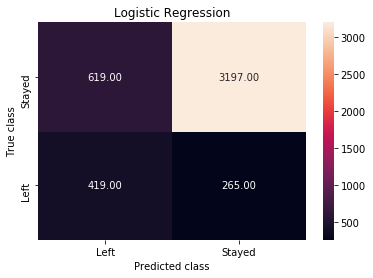

In [35]:
#Plotting Confusion Matrix 
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.ylim([0,2]) # To plot heatmap appropiratly, if your heatmap plot propely then comment this line
plt.savefig('logistic_regression')

## Implementing Random Forest Classifier ML model on feature selected by REF model to find employee churn

In [36]:
#Calling and importing the libraries to fit the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
# Checking accuracy on our test and train datasets
from sklearn.metrics import accuracy_score
print('Random Forest Classifier Train accuracy: {:.3f}'.format(accuracy_score(y_train, rf.predict(X_train))))
print('Random Forest Classifier Test accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Classifier Train accuracy: 0.999
Random Forest Classifier Test accuracy: 0.988


## Evaluating our Random Forest Classifier model by Precision and Recall and building Confusion Matrix

In [38]:
# Printing Precision and Recall and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3462
           1       0.98      0.97      0.97      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



## Building Confusion Matrix for Random Forest Classifier

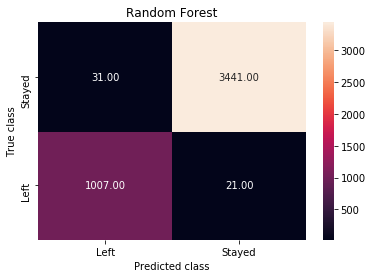

In [39]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.ylim([0,2]) # To plot heatmap appropiratly, if your heatmap plot propely then comment this line
plt.savefig('random_forest')

## Implementing Support Vector Machine ML model on feature selected by REF model to find employee churn

In [40]:
#Calling and importing the libraries to fit the Support Vector Machine model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
# Checking accuracy on our test and train datasets
from sklearn.metrics import accuracy_score
print('Support Vector Machine Train accuracy: {:.3f}'.format(accuracy_score(y_train, svc.predict(X_train))))
print('Support Vector Machine Test accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support Vector Machine Train accuracy: 0.923
Support Vector Machine Test accuracy: 0.927


## Evaluating our Support Vector Machine model by Precision and Recall and building Confusion Matrix

In [42]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3462
           1       0.83      0.86      0.84      1038

    accuracy                           0.93      4500
   macro avg       0.89      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



## Building Confusion Matrix for Support Vector Machine

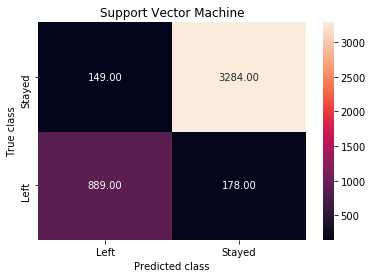

In [43]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.ylim([0,2]) # To plot heatmap appropiratly, if your heatmap plot propely then comment this line
plt.savefig('support_vector_machine')


## Implementing Gradient Boosting Classifier ML model on feature selected by REF model to find employee churn

In [44]:
#Calling and importing the libraries to fit the Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [45]:
# Checking accuracy on our test and train datasets
from sklearn.metrics import accuracy_score
print('Gradient Boosting Classifier Train accuracy: {:.3f}'.format(accuracy_score(y_train, gb.predict(X_train))))
print('Gradient Boosting Classifier Test accuracy: {:.3f}'.format(accuracy_score(y_test, gb.predict(X_test))))

Gradient Boosting Classifier Train accuracy: 0.973
Gradient Boosting Classifier Test accuracy: 0.973


## Evaluating our Gradient Boosting Classifier model by Precision and Recall and building Confusion Matrix

In [46]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3462
           1       0.95      0.93      0.94      1038

    accuracy                           0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



## Building Confusion Matrix for Gradient Boosting Classifier




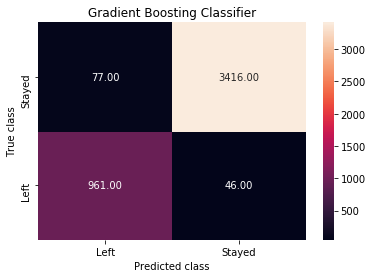

In [47]:
gb_y_pred = gb.predict(X_test)
gb_cm = metrics.confusion_matrix(gb_y_pred, y_test, [1,0])
sns.heatmap(gb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Gradient Boosting Classifier')
plt.ylim([0,2]) # To plot heatmap appropiratly, if your heatmap plot propely then comment this line
plt.savefig('Gradient Boosting Classifier')

## Applying Neural Network for Classification Problem

In [48]:
#Calling and importing the libraries to fit the Sequential Neural Network model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


In [49]:
#Fitting our model on our data
model= Sequential()
model.add(Dense(1,input_dim=10,activation='sigmoid'))
model.compile(Adam(lr=0.5),'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train)

Epoch 1/1
10499/10499 [==============================] - 3s 293us/step - loss: 0.5405 - accuracy: 0.7565


In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [51]:
from sklearn.metrics import accuracy_score
print('Sequential Neural Network Test accuracy: {:.3f}'.format(accuracy_score(y_test, model.predict_classes(X_test))))

Sequential Neural Network Test accuracy: 0.769


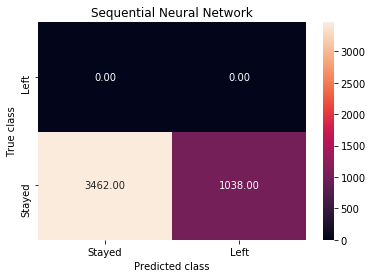

In [52]:
model_y_pred = model.predict_classes(X_test)
model_cm = metrics.confusion_matrix(model_y_pred, y_test)
sns.heatmap(model_cm, annot=True, fmt='.2f',xticklabels = ["Stayed", "Left"] , yticklabels = ["Stayed", "Left"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Sequential Neural Network')
plt.ylim([0,2]) # To plot heatmap appropiratly, if your heatmap plot propely then comment this line
plt.savefig('Sequential Neural Network')

## Model Selection

###### As mentioned in our Project Proposal that we will perform 4 classifical model those are Logistic Regression, Random Forest, SVM (Support Vector Machine), and Gradient Boosting Classifier. So we have applied all those models. Apart from that we know that if we are doing classification problem then just accuracy is not just the parameter to evaluate our model there are certain other things we need to keep in our mind when we are working on classification model.

###### That are precision, recall, confusion matrix, True Positive, False Positive, True Negative, False Negative.

###### Now lets talk about our problem that is employee churn so here we have to more focus on True Positive and Flase Positive. To understand this in our problem True Positive are those employees who are leaving the company and our ML model predicts them correctly that they are leaving the company and Flase Positive are those employees who are going to leave the company but our model predicts that they will stay in our company. So we need to keep in mind before selecting any ML model from the above 4 models that which model has more precision that is which model has less false positive.

###### By examining all the 4 model we realized that Random Forest wins the race in with high precision and accuracy. That with the score of 0.98 for precision for employees who are going to leave and test accuracy with 0.988.

###### Hence we will select Ranfom Forest as the best model for the employee churn problem.

## Cross Validation
#### Cross-validation is one of the most important techniques for generalizing our model or restricting it from getting overfitting on our dataset.

#### We will use Random Forset Classifer as our best model for Cross Validation.

#### We are using 10 k-fold Cross-Validation to train our Random Forest model.

In [53]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.986


## The average accuracy remains very close to the Random Forest model accuracy; hence, we can conclude that the model generalizes well.

#### Our average accuracy is remaining very close to the Random Forest model accuracy; hence, we can conclude that the model generalizing well.

#### We have also beat our baseline average accuracy which was 0.977.

## The ROC Curve

#### ROC and AUC curve will help us to evaluate which classification model is better to work it and will help us to understand in which model and at which threshold our model gives us the best recall or true positive rate with the less False positive rate.

#### We will not consider SVC in ROC curve as ROC curve analysis does not use accuracy or error rate. An ROC curve plots sensitivity (y axis) versus 1-specificity (x axis) and SVC gives the probability of 0 or 1 in the output.

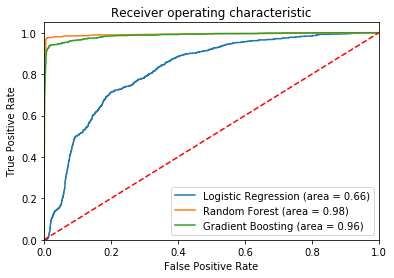

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

#### The Random Forest Classifier is the best model for this specific problem as Random Forest is far away from the dotted line which represents the ROC curve of a purely random classifier. A good classifer stays as far away from that line as possible that towards the top-left corner.

## Feature Importance for Random Forest Model

#### We will perform feature importance as by applying feature importance we can understand that which feature is affecting employee churn the most. It can help HR manager to understand why employee is going to churn and can focus on keeping that employee and try to improve that area of their company.

#### The above results shows the importance of each feature in ascending order 'promotion_last_5years' being the least important and satisfaction_level being the most important feature to understand reason of employee churn.

In [55]:
#Appling Feature Importance
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 
                           'Work_accident', 'promotion_last_5years', 'Department_RandD', 
                           'Department_hr', 'Department_management', 'salary_numeric'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.16%
Department_management-0.17%
Department_RandD-0.23%
Department_hr-0.27%
Work_accident-1.09%
salary_numeric-1.34%
last_evaluation-15.96%
number_project-18.33%
time_spend_company-22.21%
satisfaction_level-40.24%
